[{'tempo': 10461, 'miners': {'48': 2.0, '45': 0.0, '228': 0.0, '78': 0.0, '171': 0.0, '237': 0.0, '245': 0.0, '246': 0.0, '157': 0.0, '236': 0.0, '111': 0.0, '154': 0.0, '75': 0.0, '24': 2.0, '170': 0.0, '231': 0.0, '92': 0.0, '19': 0.0, '186': 0.0, '11': 45.0, '44': 0.0, '166': 0.0, '155': 0.0, '118': 0.0, '184': 0.0, '50': 0.0, '226': 0.0, '52': 0.0, '168': 0.0, '89': 0.0, '125': 0.0, '229': 0.0, '56': 0.0, '102': 0.0, '49': 0.0, '240': 100.0, '152': 0.0, '241': 100.0, '87': 100.0, '41': 100.0, '32': 100.0, '158': 0.0, '175': 0.0, '243': 100.0, '83': 100.0, '9': 126.0, '42': 0.0, '208': 0.0, '174': 30.0, '203': 0.0, '68': 0.0, '15': 0.0, '222': 115.0, '156': 0.0, '62': 0.0, '27': 210.0, '80': 0.0, '204': 100.0, '133': 0.0, '84': 0.0, '7': 117.0, '130': 17.0, '162': 0.0, '247': 0.0, '197': 0.0, '224': 100.0, '16': 149.0, '161': 0.0, '12': 0.0, '112': 0.0, '210': 0.0, '132': 0.0, '14': 0.0, '37': 0.0, '173': 0.0, '20': 0.0, '212': 0.0, '104': 0.0, '179': 0.0, '127': 0.0, '181': 0.0, '2

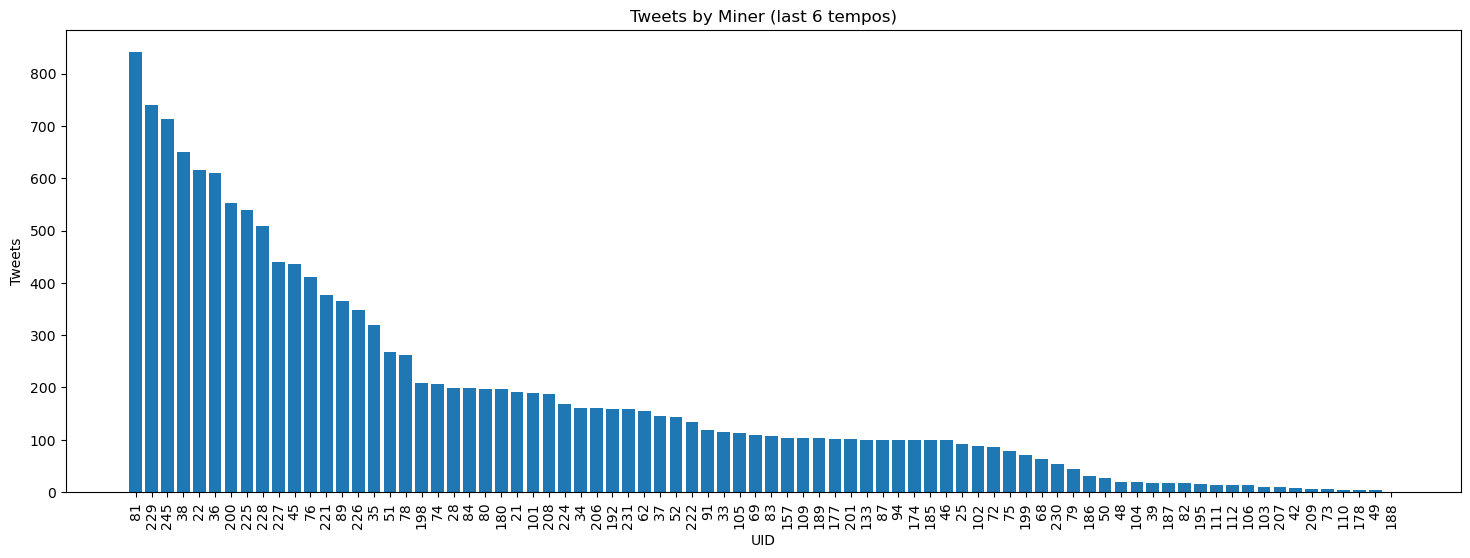

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import requests

response1 = requests.get("http://149.36.1.121:8000/volumes")
response2 = requests.get("http://165.227.153.108:8000/volumes")
response3 = requests.get("http://64.226.93.21:8000/volumes")
response4 = requests.get("http://161.97.131.133:8000/volumes")
response5 = requests.get("http://5.161.242.50:8000/volumes")

volumes1 = response1.json()
volumes2 = response2.json()
volumes3 = response3.json()
volumes4 = response4.json()
volumes5 = response5.json()

# Combine the volumes from both responses
combined_volumes = volumes1 + volumes2 + volumes3 + volumes4 + volumes5

print(combined_volumes)

# Calculate the sum of volumes for each miner
volumes_df = {}
for data in combined_volumes[-6:]:
    for miner, volume in data["miners"].items():
        if volume > 0:  # Only consider miners with volume greater than 0
            if miner in volumes_df:
                volumes_df[miner] += volume
            else:
                volumes_df[miner] = volume

# Convert to DataFrame for easier plotting
df = pd.DataFrame(list(volumes_df.items()), columns=['UID', 'Volume'])

# Sort the DataFrame by total volume
df = df.sort_values(by='Volume', ascending=False)

# Plot the volumes
plt.figure(figsize=(18, 6))
plt.bar(df['UID'], df['Volume'])
plt.xlabel('UID')
plt.ylabel('Tweets')
plt.title('Tweets by Miner (last 6 tempos)')
plt.xticks(rotation=90)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>